Found 2603 images belonging to 4 classes.
Found 647 images belonging to 4 classes.
Epoch 1/16
81/81 ━━━━━━━━━━━━━━━━━━━━ 27s 304ms/step - accuracy: 0.6957 - loss: 0.7407 - val_accuracy: 0.9812 - val_loss: 0.0594
Epoch 2/16
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 1.0000 - loss: 0.0329 - val_accuracy: 0.8571 - val_loss: 0.4553
Epoch 3/16
81/81 ━━━━━━━━━━━━━━━━━━━━ 25s 295ms/step - accuracy: 0.9823 - loss: 0.0556 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 4/16
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0125
Epoch 5/16
81/81 ━━━━━━━━━━━━━━━━━━━━ 26s 304ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 2.0814e-04
Epoch 6/16
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 1.0000 - loss: 1.6916e-04 - val_accuracy: 1.0000 - val_loss: 1.1032e-04
Epoch 7/16
81/81 ━━━━━━━━━━━━━━━━━━━━ 25s 298ms/step - accuracy: 1.0000 - loss: 8.8514e-04 - val_accuracy: 1.0000 - val_loss: 1.8634e-

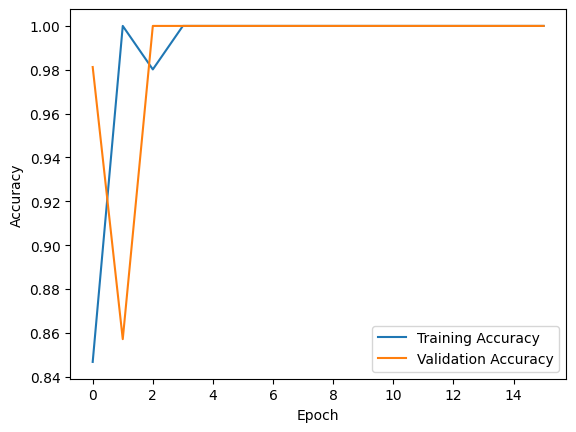

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import load_model


import cv2
import numpy as np

def replace_white_background(image):
    # Convert image to RGB (OpenCV uses BGR by default)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Create a mask where white pixels are 255 and everything else is 0
    mask = cv2.inRange(image, np.array([240, 240, 240]), np.array([255, 255, 255]))
    
    # Set the mask to black
    image[mask == 255] = [0, 0, 0]
    
    return image



# Define the path of the directories
base_dir = 'dataset'
train_dir = os.path.join(base_dir)

# Parameters
img_width, img_height = 150, 150
batch_size = 32
epochs = 16



# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
    preprocessing_function=replace_white_background)  # Apply the preprocessing function here

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

# Build the model

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 5 classes: apples, lemons, onions, tomatoes, empty
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs)

# Evaluate the model
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the model in Keras format
model.save('fruit_classifier_model_new.keras')


Found 670 images belonging to 4 classes.
Found 165 images belonging to 4 classes.
Epoch 1/16
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 494ms/step - accuracy: 0.2588 - loss: 30.6484 - val_accuracy: 0.2500 - val_loss: 28.1333
Epoch 2/16
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1333 - loss: 33.0610 - val_accuracy: 0.0000e+00 - val_loss: 28.9209
Epoch 3/16
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 415ms/step - accuracy: 0.2205 - loss: 28.1241 - val_accuracy: 0.2375 - val_loss: 24.3315
Epoch 4/16
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2812 - loss: 22.2639 - val_accuracy: 0.4000 - val_loss: 22.2797
Epoch 5/16
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 396ms/step - accuracy: 0.2263 - loss: 23.6135 - val_accuracy: 0.2438 - val_loss: 20.0192
Epoch 6/16
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1562 - loss: 22.3723 - val_accuracy: 0.2000 - val_loss: 22.7545
Epoch 7/16
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 415ms/step - accuracy: 0.2609 - loss: 18.4138 - val_accuracy: 0.2500 - val_loss: 15.8344
Epoch 

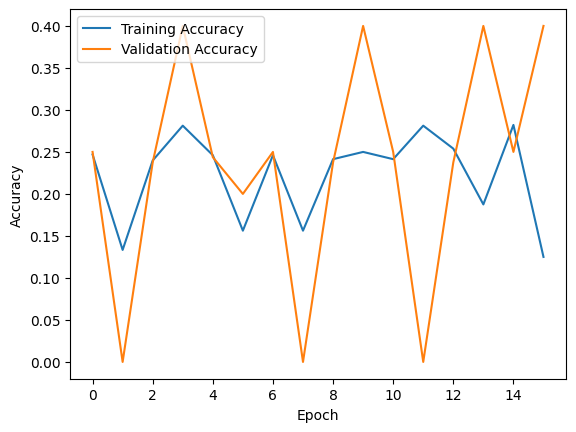

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import load_model

# Definir o caminho das diretórias
base_dir = 'dataset'
train_dir = os.path.join(base_dir)

# Parâmetros
img_width, img_height = 150, 150
batch_size = 32
epochs = 16

# Data augmentation e normalização
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

# Geradores de dados
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

model = load_model('fruit_classifier_model.keras')

model.compile(optimizer=Adam(learning_rate=1e-5),  # You might adjust the learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Treinar o modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs)

# Avaliar o modelo
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Guardar o modelo no formato Keras
model.save('fruit_classifier_model_new.keras')

Found 670 images belonging to 4 classes.
Found 165 images belonging to 4 classes.
Epoch 1/16
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 284ms/step - accuracy: 0.2531 - loss: 22.0956 - val_accuracy: 0.2727 - val_loss: 5.8981 - learning_rate: 1.0000e-04
Epoch 2/16
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 260ms/step - accuracy: 0.3827 - loss: 4.1552 - val_accuracy: 0.4606 - val_loss: 1.4383 - learning_rate: 1.0000e-04
Epoch 3/16
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 264ms/step - accuracy: 0.5790 - loss: 1.1028 - val_accuracy: 0.9636 - val_loss: 0.3435 - learning_rate: 1.0000e-04
Epoch 4/16
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 263ms/step - accuracy: 0.9227 - loss: 0.3414 - val_accuracy: 1.0000 - val_loss: 0.1350 - learning_rate: 1.0000e-04
Epoch 5/16
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 273ms/step - accuracy: 0.9710 - loss: 0.1459 - val_accuracy: 0.9939 - val_loss: 0.0632 - learning_rate: 1.0000e-04
Epoch 6/16
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 270ms/step - accuracy: 0.9949 - loss: 0.0699 - val_accuracy: 0.9939 - val_loss: 0.0446 - learnin

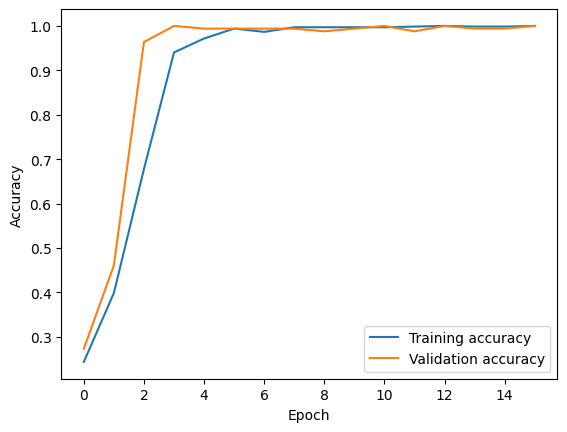

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the pre-trained model
model = load_model('fruit_classifier_model.keras')

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Prepare new data
new_train_dir = 'dataset'
img_width, img_height = 150, 150
batch_size = 32

new_train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

new_train_generator = new_train_datagen.flow_from_directory(
    new_train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

new_validation_generator = new_train_datagen.flow_from_directory(
    new_train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Continue training the model
history = model.fit(
    new_train_generator,
    validation_data=new_validation_generator,
    epochs=16,
    callbacks=[early_stopping, reduce_lr],
    verbose=1)

# Evaluate the model
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the updated model
model.save('fruit_classifier_model_new.keras')
